In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
plt.rcParams['font.size'] = 14

In [3]:
!pip install kaggle

Скачиваем данные

In [4]:
kag_info = {}
with open('../kaggle.json') as f:    
    kag_info.update(json.load(f))

In [5]:
os.environ['KAGGLE_USERNAME'] = kag_info['username']
os.environ['KAGGLE_KEY'] = kag_info['key']


!kaggle competitions download -c technoatom-technopark-property-prices-spring21
!unzip technoatom-technopark-property-prices-spring21
!rm -f technoatom-technopark-property-prices-spring21.zip

In [6]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   date        100000 non-null  object 
 2   street_id   100000 non-null  int64  
 3   build_tech  70015 non-null   float64
 4   floor       100000 non-null  int64  
 5   area        100000 non-null  int64  
 6   rooms       100000 non-null  int64  
 7   balcon      100000 non-null  int64  
 8   metro_dist  94906 non-null   float64
 9   g_lift      69942 non-null   float64
 10  n_photos    100000 non-null  int64  
 11  kw1         100000 non-null  int64  
 12  kw2         100000 non-null  int64  
 13  kw3         100000 non-null  int64  
 14  kw4         100000 non-null  int64  
 15  kw5         100000 non-null  int64  
 16  kw6         100000 non-null  int64  
 17  kw7         100000 non-null  int64  
 18  kw8         100000 non-null  int64  
 19  kw9

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   date        100000 non-null  object 
 2   street_id   100000 non-null  int64  
 3   build_tech  69853 non-null   float64
 4   floor       100000 non-null  int64  
 5   area        100000 non-null  int64  
 6   rooms       100000 non-null  int64  
 7   balcon      100000 non-null  int64  
 8   metro_dist  95006 non-null   float64
 9   g_lift      69878 non-null   float64
 10  n_photos    100000 non-null  int64  
 11  kw1         100000 non-null  int64  
 12  kw2         100000 non-null  int64  
 13  kw3         100000 non-null  int64  
 14  kw4         100000 non-null  int64  
 15  kw5         100000 non-null  int64  
 16  kw6         100000 non-null  int64  
 17  kw7         100000 non-null  int64  
 18  kw8         100000 non-null  int64  
 19  kw9

In [9]:
target = train.price
train.drop(['price', 'id'], axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [10]:
train.head(10)

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,2011-1,385,NaN,1,59,3,0,25.0,NaN,2,...,0,0,0,0,0,0,0,0,0,0
1,2011-1,247,NaN,5,53,2,1,15.0,1.0,2,...,0,0,0,0,0,0,0,0,0,0
2,2011-1,115,0.0,7,61,3,0,10.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2011-1,491,1.0,5,61,3,1,30.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-1,623,NaN,3,51,2,1,30.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
5,2011-1,414,0.0,9,48,2,0,30.0,1.0,4,...,0,0,0,0,0,0,0,0,0,0
6,2011-1,47,NaN,8,60,3,0,30.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
7,2011-1,267,1.0,8,52,2,0,30.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
8,2011-1,638,0.0,7,62,3,0,25.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
9,2011-1,359,1.0,9,35,1,1,10.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train.tail(10)

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
99990,2012-3,463,NaN,9,110,3,1,25.0,1.0,3,...,0,0,0,0,0,0,1,0,0,0
99991,2012-3,457,NaN,3,51,2,0,20.0,0.0,6,...,0,0,0,0,0,0,0,0,0,0
99992,2012-3,174,NaN,5,33,1,0,30.0,NaN,2,...,0,0,0,0,0,0,0,0,0,0
99993,2012-3,378,0.0,12,48,2,0,25.0,NaN,3,...,0,0,0,0,0,0,0,0,0,0
99994,2012-3,81,NaN,5,88,3,0,0.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
99995,2012-3,655,0.0,2,44,2,0,20.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
99996,2012-3,175,1.0,10,60,3,0,30.0,NaN,5,...,0,0,0,0,0,0,0,0,0,0
99997,2012-3,199,1.0,4,64,2,1,30.0,NaN,3,...,0,0,0,0,0,0,0,0,0,0
99998,2012-3,226,1.0,10,35,1,1,15.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
99999,2012-3,481,1.0,3,52,2,1,30.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
import datetime 

In [13]:
train.date = pd.to_datetime(train.date, format='%Y-%m')

In [14]:
test.date = pd.to_datetime(test.date, format='%Y-%m')

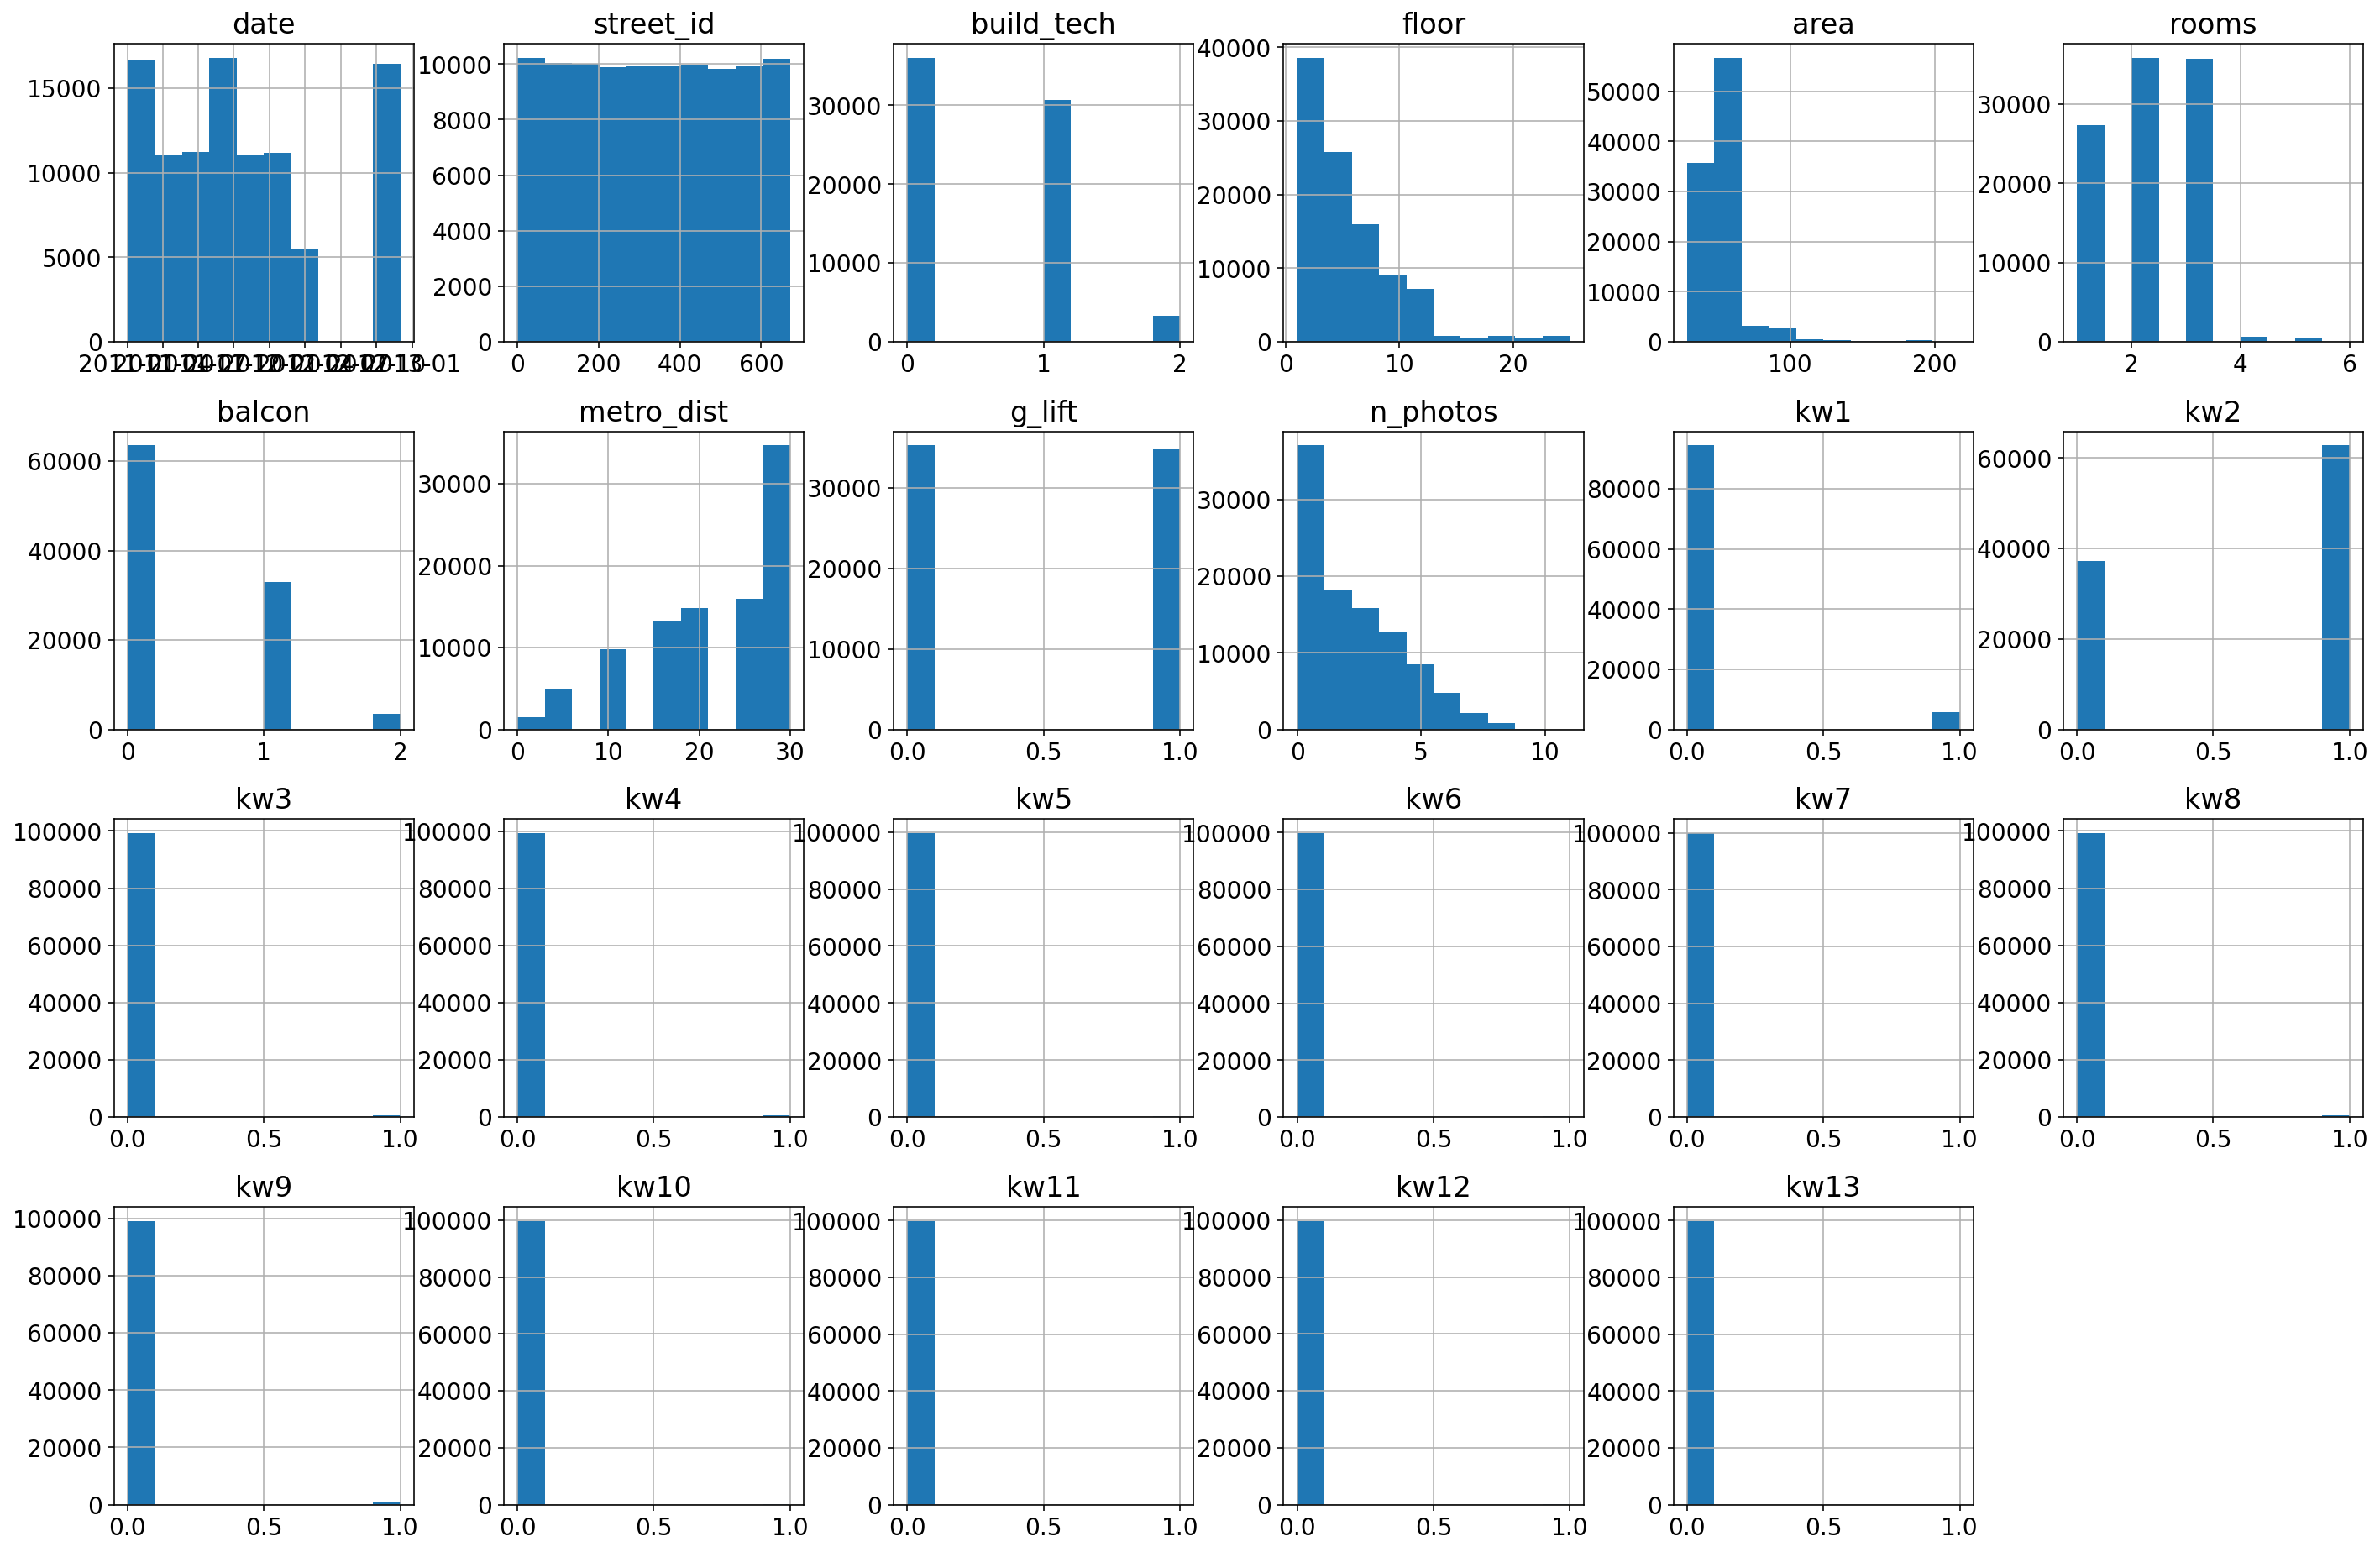

In [15]:
_ = train.hist(figsize=(24, 16), layout=(4, 6))

In [16]:
train.corr()

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
street_id,1.000000,-0.009903,0.005566,-0.003193,-0.002719,-0.006557,-0.009553,0.000040,0.002767,-0.001516,...,0.003638,-0.000109,0.001769,0.004069,-0.000880,0.001805,0.002042,-0.001957,-0.002698,-0.002504
build_tech,-0.009903,1.000000,0.208540,0.325082,0.117525,0.786932,-0.020350,0.004660,0.023556,0.000484,...,-0.074948,-0.056498,-0.039837,-0.026195,0.068748,0.070600,0.034773,0.012422,0.103749,0.036653
floor,0.005566,0.208540,1.000000,0.154219,-0.007183,0.161713,-0.010133,0.007353,-0.006983,-0.001309,...,-0.007768,0.019340,0.010487,0.059053,-0.052035,0.023518,0.015002,0.006565,0.070835,0.006221
area,-0.003193,0.325082,0.154219,1.000000,0.791903,0.258230,-0.007602,0.000100,0.164341,-0.004107,...,-0.022014,-0.015359,0.010254,0.006356,-0.002548,-0.001538,0.089378,0.037068,0.022646,0.054640
rooms,-0.002719,0.117525,-0.007183,0.791903,1.000000,0.095595,-0.005557,0.001410,0.209591,-0.003757,...,-0.013074,-0.007038,-0.006269,-0.005093,0.009969,0.012866,0.023959,0.008838,-0.011896,0.018679
balcon,-0.006557,0.786932,0.161713,0.258230,0.095595,1.000000,-0.014762,-0.000954,0.015356,0.000713,...,-0.058797,-0.045426,-0.030937,-0.020836,0.051245,0.056311,0.025192,0.012225,0.079515,0.036447
metro_dist,-0.009553,-0.020350,-0.010133,-0.007602,-0.005557,-0.014762,1.000000,-0.000318,0.003495,0.000150,...,-0.002114,-0.001810,0.000055,-0.001903,-0.005023,-0.001844,-0.000827,-0.005578,0.003677,-0.003367
g_lift,0.000040,0.004660,0.007353,0.000100,0.001410,-0.000954,-0.000318,1.000000,0.005239,0.001443,...,-0.005937,-0.003451,0.002324,0.002066,-0.001361,0.008881,-0.005300,-0.002636,0.003051,0.007250
n_photos,0.002767,0.023556,-0.006983,0.164341,0.209591,0.015356,0.003495,0.005239,1.000000,0.031864,...,0.004162,0.008035,0.002836,0.005117,0.008627,0.004710,0.005796,0.004511,0.003168,0.005861
kw1,-0.001516,0.000484,-0.001309,-0.004107,-0.003757,0.000713,0.000150,0.001443,0.031864,1.000000,...,0.005056,-0.000313,0.002584,-0.002602,0.000835,0.002372,-0.001450,-0.004019,-0.000044,0.004865


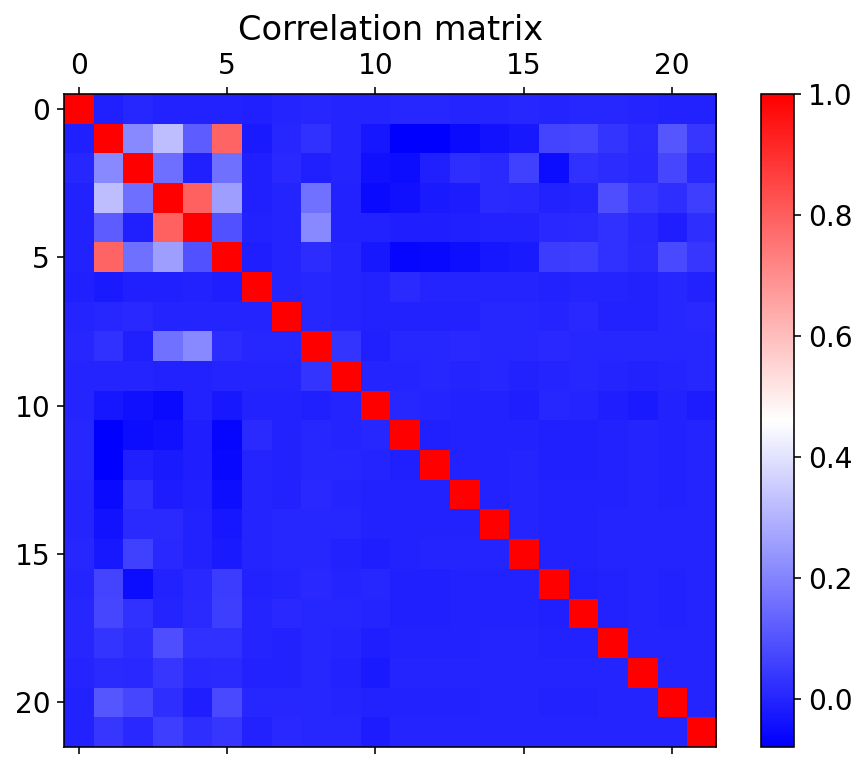

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set(title='Correlation matrix')
m = ax.matshow(train.corr(), cmap=plt.cm.bwr)
fig.colorbar(m)

Надо заполнить пропуски. Начнем с `build_tech`, судя по корреляционной матрице имеет смысл заполнять его в соответствии с `balcon`

In [18]:
from tqdm import tqdm_notebook
import warnings 
warnings.filterwarnings("ignore")

In [19]:
def fill_build_tech(dataset):
    index_to_fill = np.where(dataset['build_tech'].isna() == 1)[0]
    index_valid = np.delete(np.arange(dataset.shape[0]), index_to_fill)
    
    tmp = {}
    for row in tqdm_notebook(dataset.loc[index_valid, ['balcon', 'build_tech']].values.astype(int), desc='Construct Base'):
        if row[0] not in tmp:
            tmp[row[0]] = {}
        if tmp[row[0]].get(row[1]) is None:
            tmp[row[0]][row[1]] = 0
        tmp[row[0]][row[1]] += 1
    
    def_value = np.argmax(dataset.build_tech.value_counts().values)  # Если нужной улицы не найдется 
    for num, row in enumerate(tqdm_notebook(dataset.loc[index_to_fill, 'balcon'].values.astype(int), desc='Filling NaNs')):
        # Берем значение наиблее встречающегося типа зданий на улице, если такая улица есть в базе
        value = sorted(tmp.get(row).items(), key=lambda x: x[1])[-1][0] if tmp.get(row, -1) != -1 else def_value
        dataset.loc[index_to_fill[num], 'build_tech'] = value
        

In [20]:
fill_build_tech(train)

Construct Base:   0%|          | 0/70015 [00:00<?, ?it/s]

Filling NaNs:   0%|          | 0/29985 [00:00<?, ?it/s]

In [21]:
fill_build_tech(test)

Construct Base:   0%|          | 0/69853 [00:00<?, ?it/s]

Filling NaNs:   0%|          | 0/30147 [00:00<?, ?it/s]

In [22]:
train.fillna({'g_lift': train.g_lift.median(),
             'metro_dist': train.metro_dist.mean()}, 
             inplace=True
            )

In [23]:
test.fillna({'g_lift': test.g_lift.median(),
             'metro_dist': test.metro_dist.mean()}, 
             inplace=True
            )

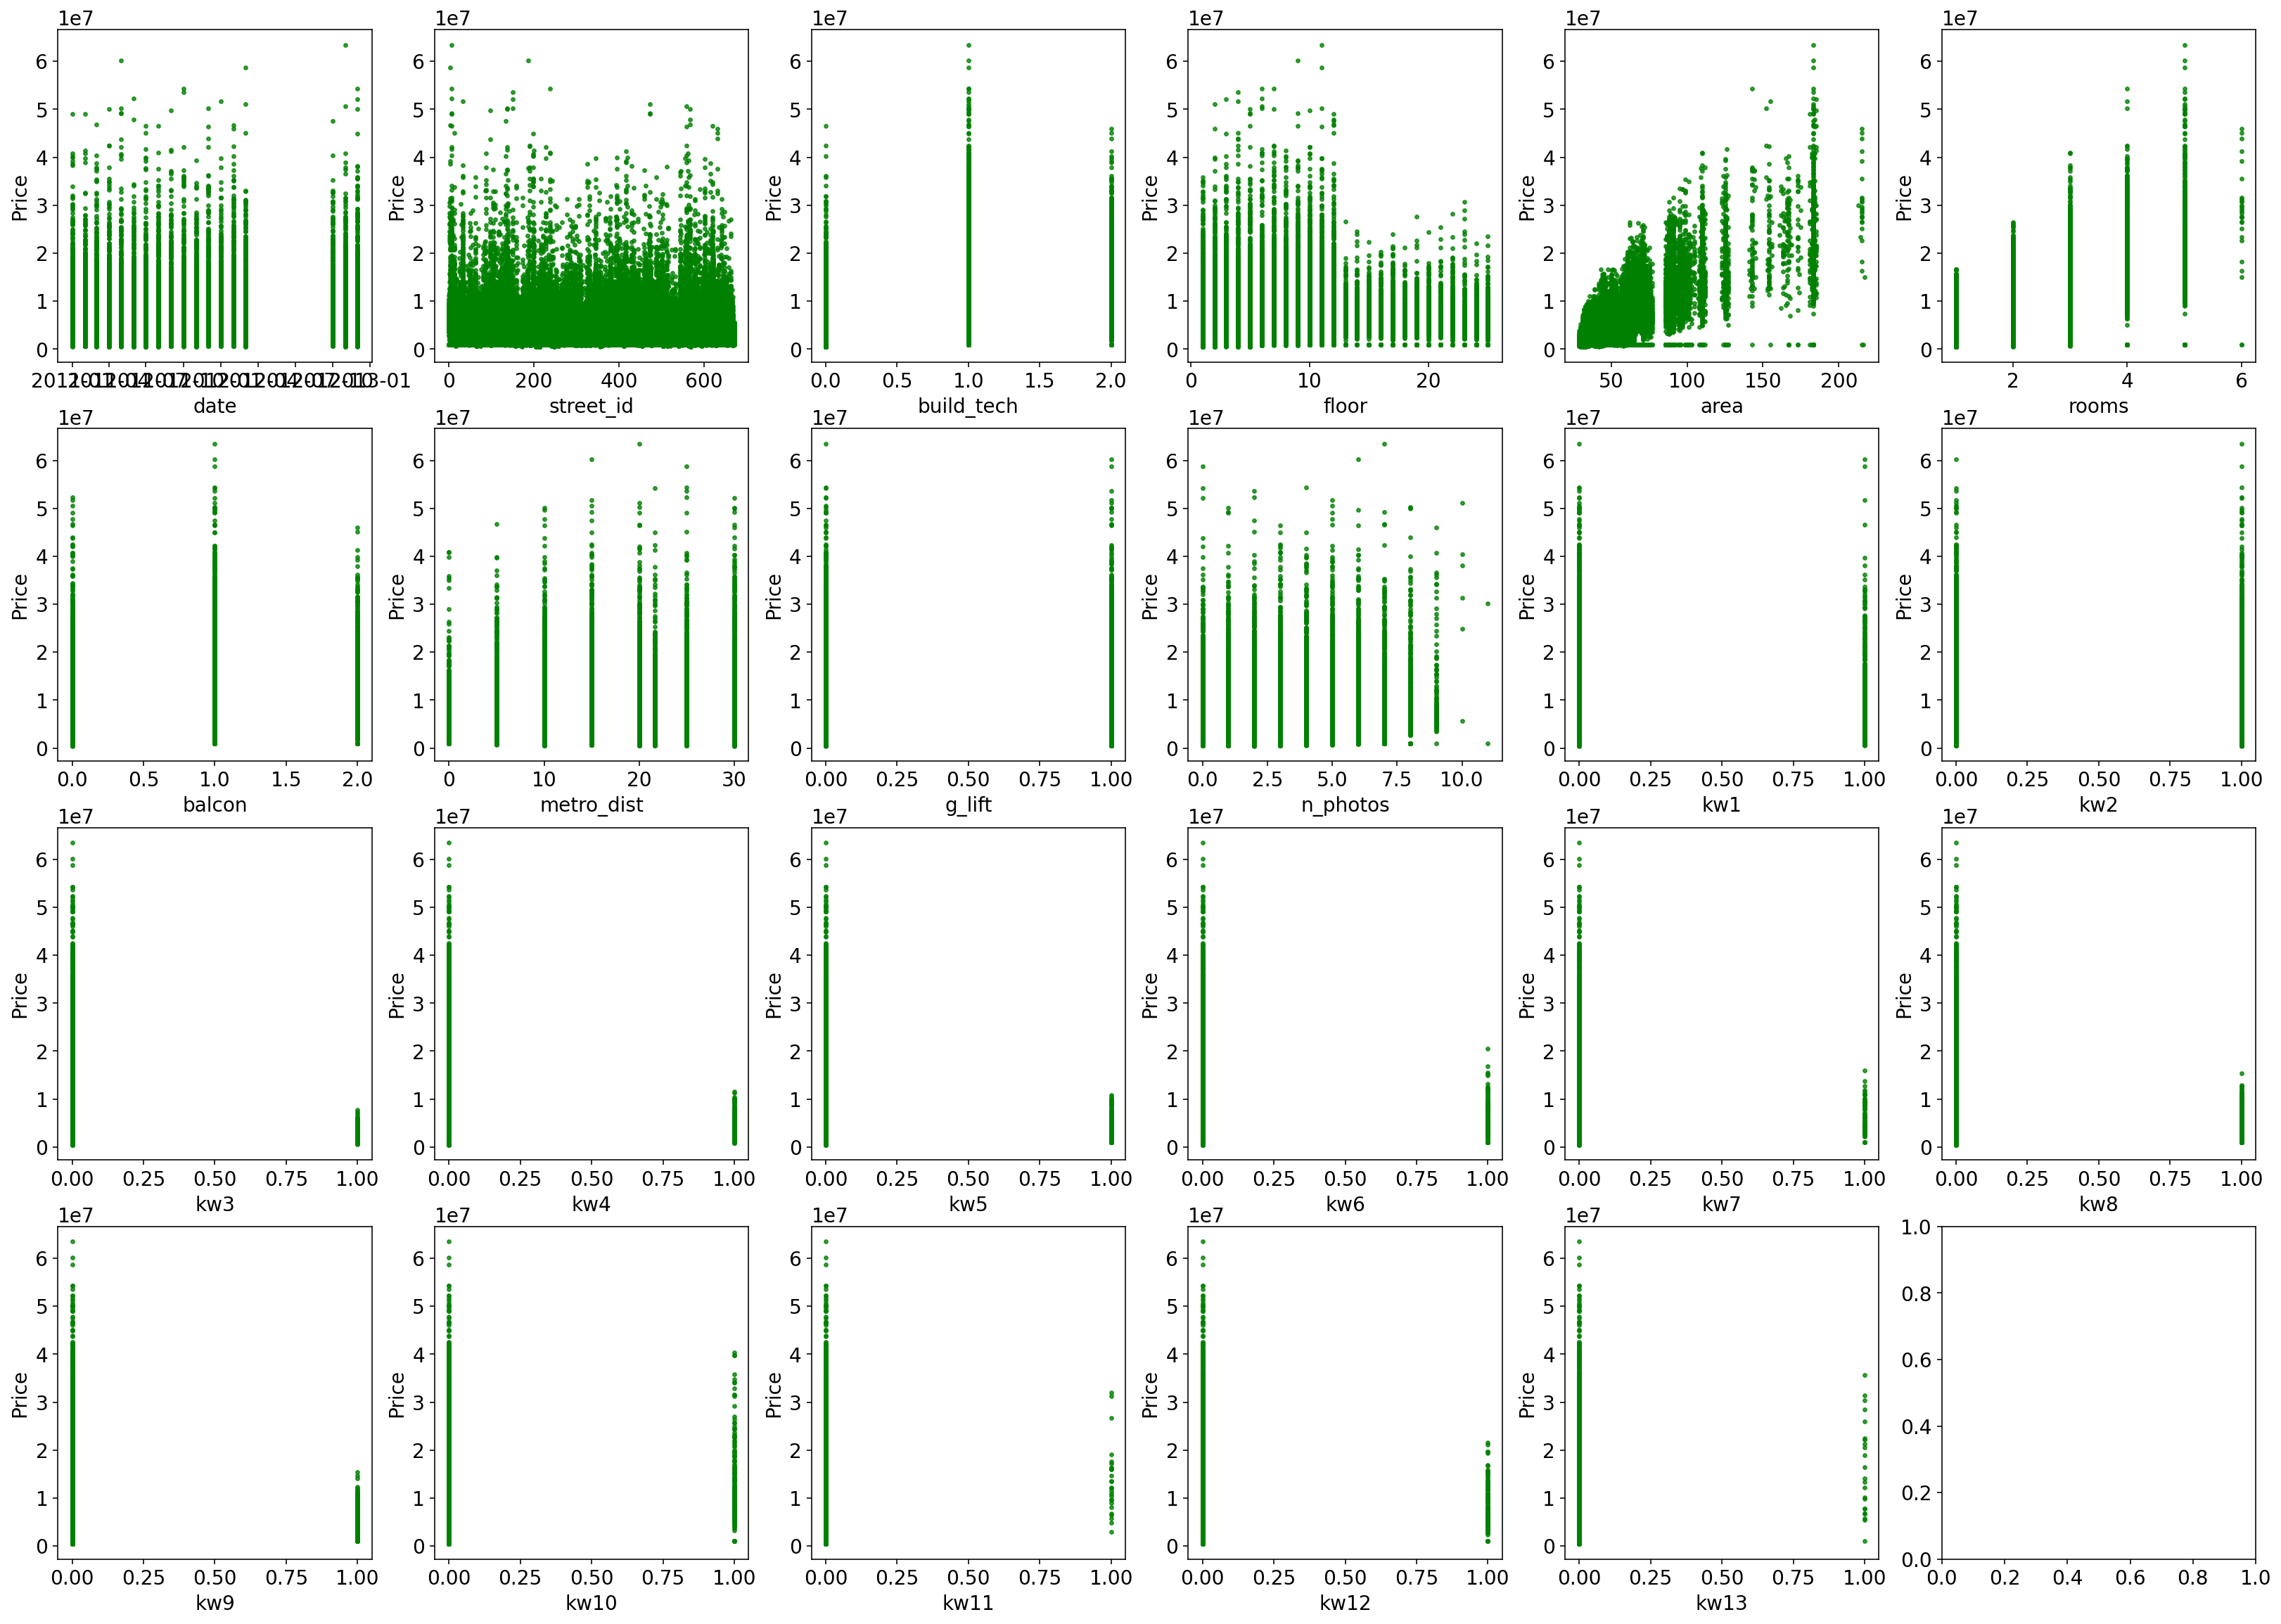

In [24]:
fig, ax = plt.subplots(4, 6, figsize=(28, 20))
i = 0 
for row in range(4):
    for col in range(6):
        if i >= train.shape[1]:
            break
        ax[row, col].scatter(train[train.columns[i]], target,  c='green', s=6, alpha=0.75)
        ax[row, col].set(xlabel=train.columns[i], ylabel='Price')
        i += 1

Есть необычные значения цен при больших размерах площади, это скорее похоже на ошибку в заполнении данныхб поэтому уберем эти значения

Text(0.5, 0, 'area')

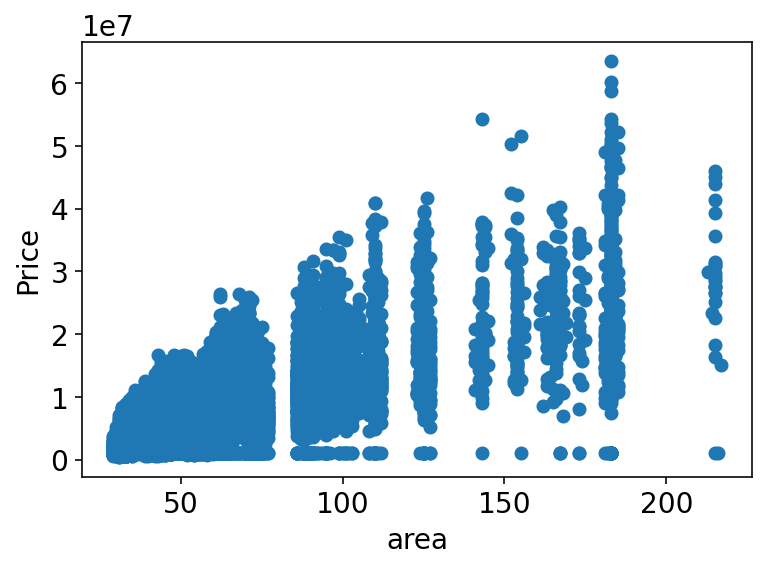

In [25]:
plt.scatter(train['area'], target)
plt.ylabel('Price')
plt.xlabel('area')

In [26]:
ind_to_drop = np.where((train.area > 25) & (target < 0.2 * 1e07))[0]

Text(0.5, 0, 'area')

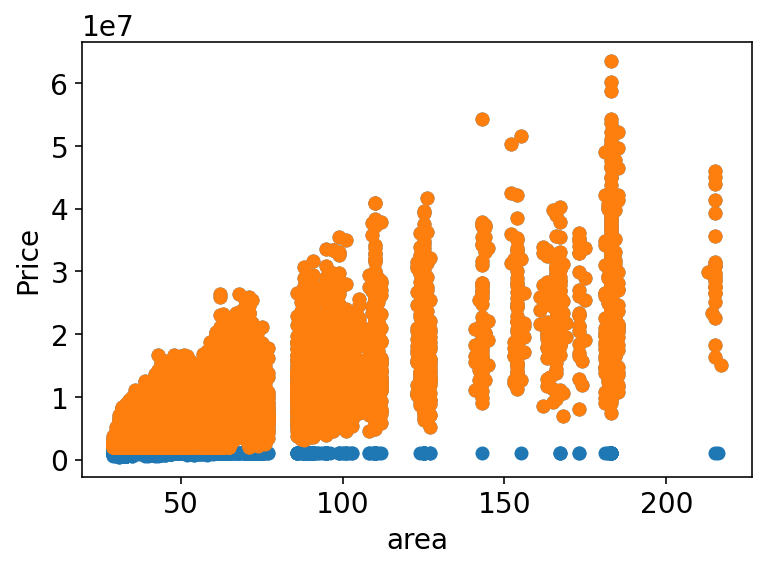

In [27]:
plt.scatter(train['area'], target)
plt.scatter(train['area'].drop(index=ind_to_drop), target.drop(index=ind_to_drop))
plt.ylabel('Price')
plt.xlabel('area')

In [28]:
train = train.drop(index=ind_to_drop)
target = target.drop(index=ind_to_drop)

Масштабирование признаков

In [29]:
# Пока нет идей как хорошо использовать дату, поэтому пока уберу ее из признаков
train.drop('date', axis=1, inplace=True)
test.drop('date', axis=1, inplace=True)

In [30]:
# Эмпирически - без этого признака лучше)
train.drop('n_photos', axis=1, inplace=True)
test.drop('n_photos', axis=1, inplace=True)

Я вижу два числовых признака `area`, `metro_dist`, попробуем привести их к одному масштабу

In [31]:
def mm_scaler(dataset, col):
    '''Max, Min scaler'''
    _max = dataset[col].max()
    _min = dataset[col].min()
    dataset[col] = dataset[col].apply(lambda x: (x - _min) / (_max - _min))

In [32]:
mm_scaler(train, 'metro_dist')
mm_scaler(train, 'area')
mm_scaler(test, 'metro_dist')
mm_scaler(test, 'area')

Прежде чем строить ансамбли посмотрим какой результат нам покажут простешие модели

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_absolute_error

In [34]:
def print_metrics(y_test, ans):
    print("MAE ~", np.round(mean_absolute_error(y_test, ans), 4))
    print("R2_score ~", np.round(r2_score(y_test, ans), 4))

In [35]:
def submit(ans, tag, send=False):
    '''Сохранение и загрузка на kaggle'''
    _id = 100000 + np.arange(ans.size)
    
    data = np.concatenate((_id[:, np.newaxis], ans[:, np.newaxis]), axis=1)
    df = pd.DataFrame(data, columns=['id', 'price'])
    df['id'] = df['id'].apply(lambda x: int(x))
    df.to_csv(f'sub_{tag}.csv', index=False)
    if send:
        os.system(f'kaggle competitions submit -c technoatom-technopark-property-prices-spring21 -f "sub_{tag}.csv" -m "next_sub"')

In [36]:
def ohe_transform(df, name):
    sm = pd.get_dummies(df[name], prefix=name)
    df = df.join(sm)
    df.drop(name, axis=1, inplace=True)
    return df

Ансамблям деревьев по идее должно быть все равно на то, что не которые признаки записаны через LabelsEncoding. Но для линейных моделей такая нумерация может дать необосновано большее значение веса для признака с большим номером, поэтому сделаем разреженные признаки для линейной регрессии

In [37]:
df_train = train.copy()
df_test = test.copy()

In [38]:
for cat_feature in  ['floor', 'street_id']:
    df_train = ohe_transform(df_train, cat_feature)
    df_test = ohe_transform(df_test, cat_feature)

In [39]:
random_state = 4

#### Single Models

In [40]:
new_train, new_test, new_train_target, new_test_target = train_test_split(train, target, random_state=random_state, test_size=0.2)

In [41]:
names = ['Dec_Tree', 'Lin_Reg', 'Ridge']
models = [DecisionTreeRegressor(random_state=random_state), LinearRegression(), Ridge()]
for num, model in enumerate(models):
    model.fit(new_train, new_train_target)
    print(f'\nModel: {names[num]}')
    print_metrics(new_test_target, model.predict(new_test))


Model: Dec_Tree
MAE ~ 1245482.1797
R2_score ~ 0.6476

Model: Lin_Reg
MAE ~ 1669730.0466
R2_score ~ 0.5843

Model: Ridge
MAE ~ 1669873.2968
R2_score ~ 0.5842


Теперь посмотрим на результат для более разреженных данных

In [42]:
new_train_sparse, new_test_sparse, new_train_target_sparse, new_test_target_sparse = train_test_split(df_train, target, random_state=random_state, test_size=0.2)

In [43]:
names = ['Dec_Tree', 'Lin_Reg', 'Ridge']
models = [DecisionTreeRegressor(random_state=random_state), LinearRegression(), Ridge()]
for num, model in enumerate(models):
    model.fit(new_train_sparse, new_train_target_sparse)
    print(f'\nModel: {names[num]}')
    print_metrics(new_test_target_sparse, model.predict(new_test_sparse))


Model: Dec_Tree
MAE ~ 846774.2824
R2_score ~ 0.848

Model: Lin_Reg
MAE ~ 818341.3983
R2_score ~ 0.8762

Model: Ridge
MAE ~ 816416.1629
R2_score ~ 0.8762


То есть одиночные линейные модели работают лучше на разреженных данных. Немного удивительно, для меня, Дерево решений тоже показало лучший результат для разреженных данных.
Посмотрим как будет зависеть результат от величины регуляризации.

Но как-то хорошо получилось для линейных моделей, попробуем поискать лучшее значение для регуляризации

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
params = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.75, 1.0, 2.0, 10.0]}
grid_ridge = GridSearchCV(Ridge(random_state=random_state), param_grid=params, cv=4, n_jobs=4, scoring='r2')
grid_ridge.fit(new_train_sparse, new_train_target_sparse)

GridSearchCV(cv=4, estimator=Ridge(random_state=4), n_jobs=4,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.75, 1.0, 2.0,
                                   10.0]},
             scoring='r2')

In [46]:
grid_ridge.cv_results_['mean_test_score']

array([0.87143774, 0.87143821, 0.871442  , 0.87144429, 0.8714395 ,
       0.87142281, 0.87139518, 0.87118421, 0.8653866 ])

In [47]:
grid_ridge.best_estimator_, grid_ridge.best_score_

(Ridge(alpha=0.2, random_state=4), 0.8714442865354215)

In [48]:
print_metrics(new_test_target_sparse, grid_ridge.best_estimator_.predict(new_test_sparse))

MAE ~ 817901.4358
R2_score ~ 0.8762


### Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

labels features

In [50]:
nests = [50, 100, 250, 500]
ndepths = [5, 7, 10, 12]

pure_rf_results = np.zeros((2, len(nests), len(ndepths)))

for row, n_trees in enumerate(tqdm_notebook(nests, desc='Estimators')):
    for col, depth in enumerate(tqdm_notebook(ndepths, desc=f'Depth for {n_trees} trees')):
        model = RandomForestRegressor(n_estimators=n_trees, max_depth=depth, random_state=random_state, n_jobs=-1)
        model.fit(new_train, new_train_target)
        pure_rf_results[0, row, col] = r2_score(new_train_target, model.predict(new_train))
        pure_rf_results[1, row, col] = r2_score(new_test_target, model.predict(new_test))

Estimators:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 50 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 100 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 250 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 500 trees:   0%|          | 0/4 [00:00<?, ?it/s]

OHE features

In [51]:
nests = [50, 100, 250, 500]
ndepths = [5, 7, 10, 12]

pure_rf_sparse_results = np.zeros((2, len(nests), len(ndepths)))

for row, n_trees in enumerate(tqdm_notebook(nests, desc='Estimators')):
    for col, depth in enumerate(tqdm_notebook(ndepths, desc=f'Depth for {n_trees} trees')):
        model = RandomForestRegressor(n_estimators=n_trees, max_depth=depth, random_state=random_state, n_jobs=-1)
        model.fit(new_train_sparse, new_train_target_sparse)
        pure_rf_sparse_results[0, row, col] = r2_score(new_train_target_sparse, model.predict(new_train_sparse))
        pure_rf_sparse_results[1, row, col] = r2_score(new_test_target_sparse, model.predict(new_test_sparse))

Estimators:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 50 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 100 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 250 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 500 trees:   0%|          | 0/4 [00:00<?, ?it/s]

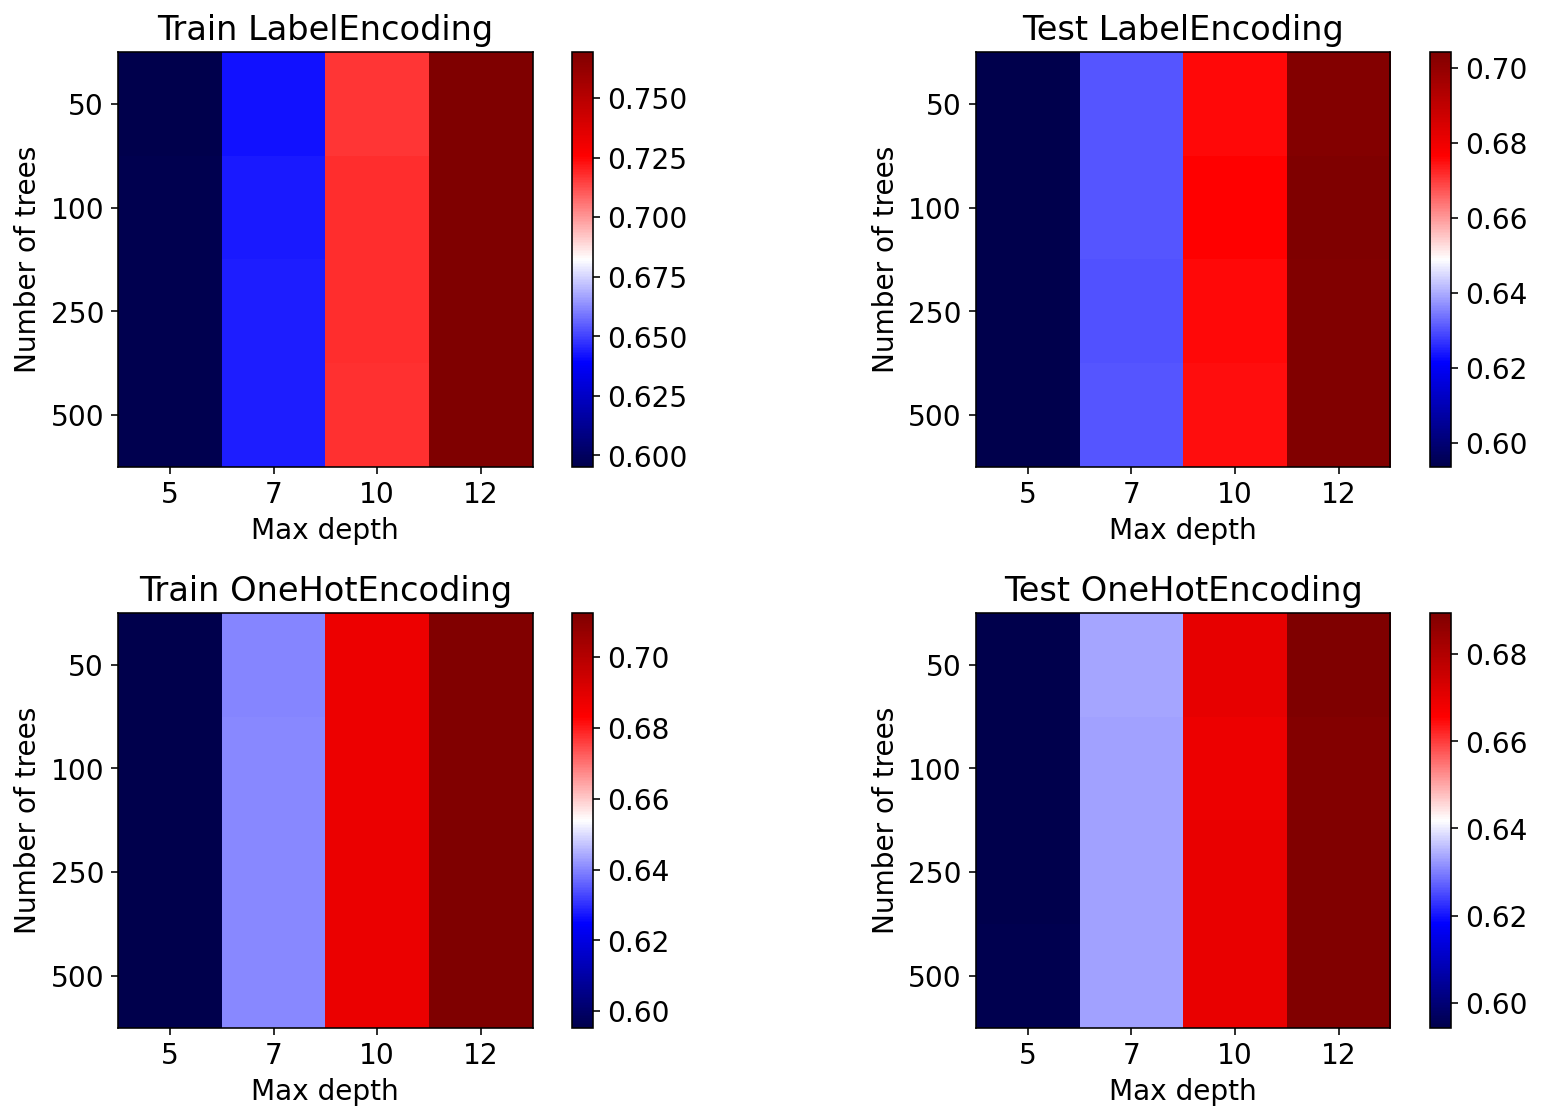

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)
ax[0, 0].set(xticks=np.arange(len(ndepths)), xticklabels=ndepths, xlabel='Max depth',
          yticks=np.arange(len(nests)), yticklabels=nests, ylabel='Number of trees',
          title='Train LabelEncoding'
      )
obj = ax[0, 0].imshow(pure_rf_results[0], cmap=plt.cm.seismic)
fig.colorbar(obj, ax=ax[0, 0])

ax[0, 1].set(xticks=np.arange(len(ndepths)), xticklabels=ndepths, xlabel='Max depth',
          yticks=np.arange(len(nests)), yticklabels=nests, ylabel='Number of trees',
          title='Test LabelEncoding'
      )
obj = ax[0, 1].imshow(pure_rf_results[1], cmap=plt.cm.seismic)
fig.colorbar(obj, ax=ax[0, 1],)

ax[1, 0].set(xticks=np.arange(len(ndepths)), xticklabels=ndepths, xlabel='Max depth',
          yticks=np.arange(len(nests)), yticklabels=nests, ylabel='Number of trees',
          title='Train OneHotEncoding'
      )
obj = ax[1, 0].imshow(pure_rf_sparse_results[0], cmap=plt.cm.seismic)
fig.colorbar(obj, ax=ax[1, 0])

ax[1, 1].set(xticks=np.arange(len(ndepths)), xticklabels=ndepths, xlabel='Max depth',
          yticks=np.arange(len(nests)), yticklabels=nests, ylabel='Number of trees',
          title='Test OneHotEncoding'
      )
obj = ax[1, 1].imshow(pure_rf_sparse_results[1], cmap=plt.cm.seismic)
fig.colorbar(obj, ax=ax[1, 1],)

In [53]:
pure_rf_results

array([[[0.59520423, 0.64197453, 0.71672508, 0.76863202],
        [0.59606758, 0.64320729, 0.7179368 , 0.76914522],
        [0.59626176, 0.64354731, 0.71776752, 0.7692806 ],
        [0.59630969, 0.64348681, 0.71743104, 0.76914115]],

       [[0.59360137, 0.63038499, 0.6753324 , 0.70301196],
        [0.59386515, 0.63071137, 0.6765045 , 0.70423635],
        [0.59396757, 0.63030298, 0.67548797, 0.70366874],
        [0.59396835, 0.63037217, 0.67486643, 0.70363327]]])

In [54]:
pure_rf_sparse_results

array([[[0.59535506, 0.64001932, 0.68703109, 0.71156633],
        [0.59580549, 0.64023037, 0.68718104, 0.71194999],
        [0.59559676, 0.64020535, 0.68752493, 0.71237694],
        [0.59565189, 0.64036622, 0.68758467, 0.71247298]],

       [[0.59426696, 0.63339759, 0.66978666, 0.68945215],
        [0.59447632, 0.63294062, 0.66892203, 0.68868315],
        [0.59454371, 0.63306255, 0.66969577, 0.68888932],
        [0.59489924, 0.63315689, 0.66967114, 0.68889289]]])

Для ансамля деревьев получается, что labelencoding дает немного лучший результат.
Далее, попробуем научить несколько разных моделей и на их ответах построим еще одну модель

### Stacking


Соответственно, будем учить несколько RF моделей на неразреженных данных, а единичное дерево плюс несколько линейных моделей с разным видом регулирезации и ее значения на разреженных данных. Потом объединим ответы и построим на них линейную модель и RF. Также будем учить модели не на полном количестве признаков а делать подвыборки из них для каждой из моделей

In [60]:
st_train, st_test, st_train_target, st_test_target = train_test_split(new_train, new_train_target, test_size=0.35, random_state=random_state)

In [61]:
st_train_sp, st_test_sp, st_train_target_sp, st_test_target_sp = train_test_split(new_train_sparse, new_train_target_sparse, test_size=0.35, random_state=random_state)

In [62]:
n_models = 20
np.random.seed(random_state)
results_on_st_test = np.zeros((n_models, st_test.shape[0]))
results_on_new_test = np.zeros((n_models, new_test.shape[0]))
TEST_TO_SUBMIT = np.zeros((n_models, test.shape[0]))
for k in tqdm_notebook(range(10), desc='RF '):
    model = RandomForestRegressor(n_estimators=250, max_depth=12, max_features=st_train.shape[1]//3)
    model.fit(st_train, st_train_target)
    results_on_st_test[k] = model.predict(st_test)
    results_on_new_test[k] = model.predict(new_test)
    TEST_TO_SUBMIT[k] = model.predict(test)

RF :   0%|          | 0/10 [00:00<?, ?it/s]

Линейные модели будут учиться на разреженных данных 

In [63]:
for k in tqdm_notebook(range(10), desc="LinReg"):
    indexes = np.random.choice(np.arange(st_train_sp.shape[1]), size=st_train_sp.shape[1]//3, replace=False)
    
    model = Ridge(alpha=0.75, random_state=random_state)    
    model.fit(st_train_sp.values[:, indexes], st_train_target_sp)
    
    results_on_st_test[k+10] = model.predict(st_test_sp.values[:, indexes])
    results_on_new_test[k+10] = model.predict(new_test_sparse.values[:, indexes])
    TEST_TO_SUBMIT[k+10] = model.predict(df_test.values[:, indexes])

LinReg:   0%|          | 0/10 [00:00<?, ?it/s]

Если на выходе RF

Смотрим обучение только на ответах модели

In [64]:
for n_ests in [100, 200]:
    for depth in [5, 10, 20]:
        final_model = RandomForestRegressor(n_estimators=n_ests, max_depth=depth, random_state=random_state)
        final_model.fit(results_on_st_test.T, st_test_target)
        print(f"n_estimators: {n_ests} \t depth: {depth}")
        print_metrics(new_test_target, final_model.predict(results_on_new_test.T))
        print()

n_estimators: 100 	 depth: 5
MAE ~ 1284349.1181
R2_score ~ 0.7674

n_estimators: 100 	 depth: 10
MAE ~ 1000563.2796
R2_score ~ 0.8518

n_estimators: 100 	 depth: 20
MAE ~ 833043.3239
R2_score ~ 0.8837

n_estimators: 200 	 depth: 5
MAE ~ 1283303.8085
R2_score ~ 0.7684

n_estimators: 200 	 depth: 10
MAE ~ 998714.5253
R2_score ~ 0.8528

n_estimators: 200 	 depth: 20
MAE ~ 830920.7824
R2_score ~ 0.8843



А здесь на ответах моделей плюс исходная выборка

In [65]:
for n_ests in [100, 200]:
    for depth in [5, 10, 20]:
        final_model = RandomForestRegressor(n_estimators=n_ests, max_depth=depth, random_state=random_state)
        final_model.fit(np.concatenate((st_test, results_on_st_test.T), axis=1), st_test_target)
        print(f"n_estimators: {n_ests} \t depth: {depth}")
        print_metrics(new_test_target, final_model.predict(np.concatenate((new_test, results_on_new_test.T), axis=1)))
        print()

n_estimators: 100 	 depth: 5
MAE ~ 1283616.6039
R2_score ~ 0.7678

n_estimators: 100 	 depth: 10
MAE ~ 984305.4929
R2_score ~ 0.8565

n_estimators: 100 	 depth: 20
MAE ~ 794163.5407
R2_score ~ 0.8917

n_estimators: 200 	 depth: 5
MAE ~ 1282513.3558
R2_score ~ 0.7689

n_estimators: 200 	 depth: 10
MAE ~ 982160.011
R2_score ~ 0.8573

n_estimators: 200 	 depth: 20
MAE ~ 792089.3556
R2_score ~ 0.8927



In [68]:
rf = final_model.predict(np.concatenate((new_test, results_on_new_test.T), axis=1))

Если на выходе LinReg

In [69]:
for alpha in [0.2, 0.5, 0.75, 1.0]:
    final_model = Ridge(alpha=alpha, random_state=random_state)
    final_model.fit(results_on_st_test.T, st_test_target)
    print(f"alpha = {alpha}")
    print_metrics(new_test_target, final_model.predict(results_on_new_test.T))
    print()

alpha = 0.2
MAE ~ 1230395.7814
R2_score ~ 0.7691

alpha = 0.5
MAE ~ 1230395.7814
R2_score ~ 0.7691

alpha = 0.75
MAE ~ 1230395.7814
R2_score ~ 0.7691

alpha = 1.0
MAE ~ 1230395.7814
R2_score ~ 0.7691



In [70]:
for alpha in [0.2, 0.5, 0.75, 1.0]:
    final_model = Ridge(alpha=alpha, random_state=random_state)
    final_model.fit(np.concatenate((st_test_sp, results_on_st_test.T), axis=1), st_test_target)
    print(f"alpha = {alpha}")
    print_metrics(new_test_target, final_model.predict(np.concatenate((new_test_sparse, results_on_new_test.T), axis=1)))
    print()

alpha = 0.2
MAE ~ 765291.0817
R2_score ~ 0.8937

alpha = 0.5
MAE ~ 764253.1993
R2_score ~ 0.8937

alpha = 0.75
MAE ~ 763496.5363
R2_score ~ 0.8938

alpha = 1.0
MAE ~ 762822.0644
R2_score ~ 0.8938



In [71]:
lr = final_model.predict(np.concatenate((new_test_sparse, results_on_new_test.T), axis=1))

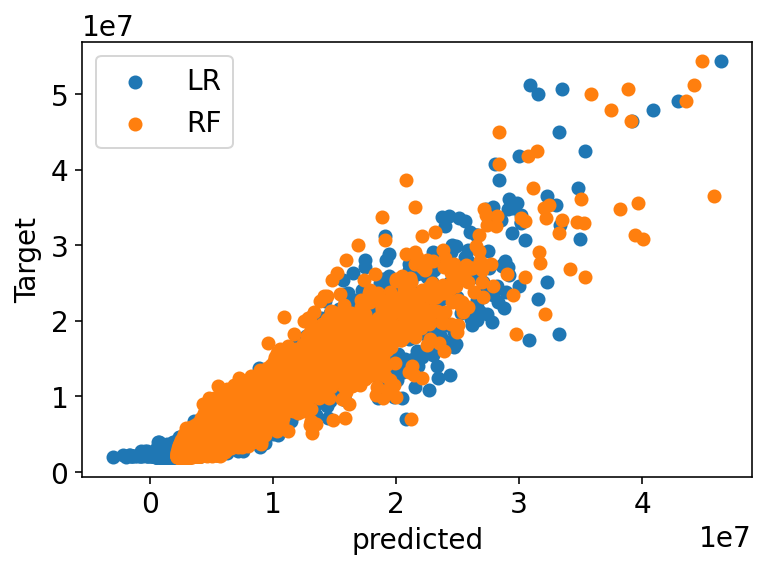

In [77]:
plt.ylabel('Target')
plt.xlabel('predicted')
plt.scatter(lr, new_test_target_sparse, label='LR')
plt.scatter(rf, new_test_target, label='RF')
plt.legend()

In [78]:
model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=random_state)
model.fit(np.concatenate((st_test, results_on_st_test.T), axis=1), st_test_target)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=4)

In [ ]:
markers = model.predict(np.concatenate((test.values, TEST_TO_SUBMIT.T), axis=1))
submit(markers, tag='', send=True)

Но такое решение дает 1194771  и не проходит минимум

Несмотря на значение R2_score с линейной регрессией на выходе получилось что-то странное: есть значения меньше нуля, чего не может быть

### Boosting

In [140]:
!pip install xgboost

In [80]:
import xgboost as xgb

In [81]:
nests = [200, 300, 500, 1000, 2000, 2500, 3000]
ndepths = [4, 5, 7, 10]

pure_xgb_results = np.zeros((2, len(nests), len(ndepths)))

for row, n_trees in enumerate(tqdm_notebook(nests, desc='Estimators')):
    for col, depth in enumerate(tqdm_notebook(ndepths, desc=f'Depth for {n_trees} trees')):
        model = xgb.XGBRegressor(n_estimators=n_trees, learning_rate=0.1, reg_lambda=0.5, max_depth=depth, random_state=random_state, n_jobs=-1)
        model.fit(new_train, new_train_target)
        pure_xgb_results[0, row, col] = r2_score(new_train_target, model.predict(new_train))
        pure_xgb_results[1, row, col] = r2_score(new_test_target, model.predict(new_test))

Estimators:   0%|          | 0/7 [00:00<?, ?it/s]

Depth for 200 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 300 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 500 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 1000 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 2000 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 2500 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 3000 trees:   0%|          | 0/4 [00:00<?, ?it/s]

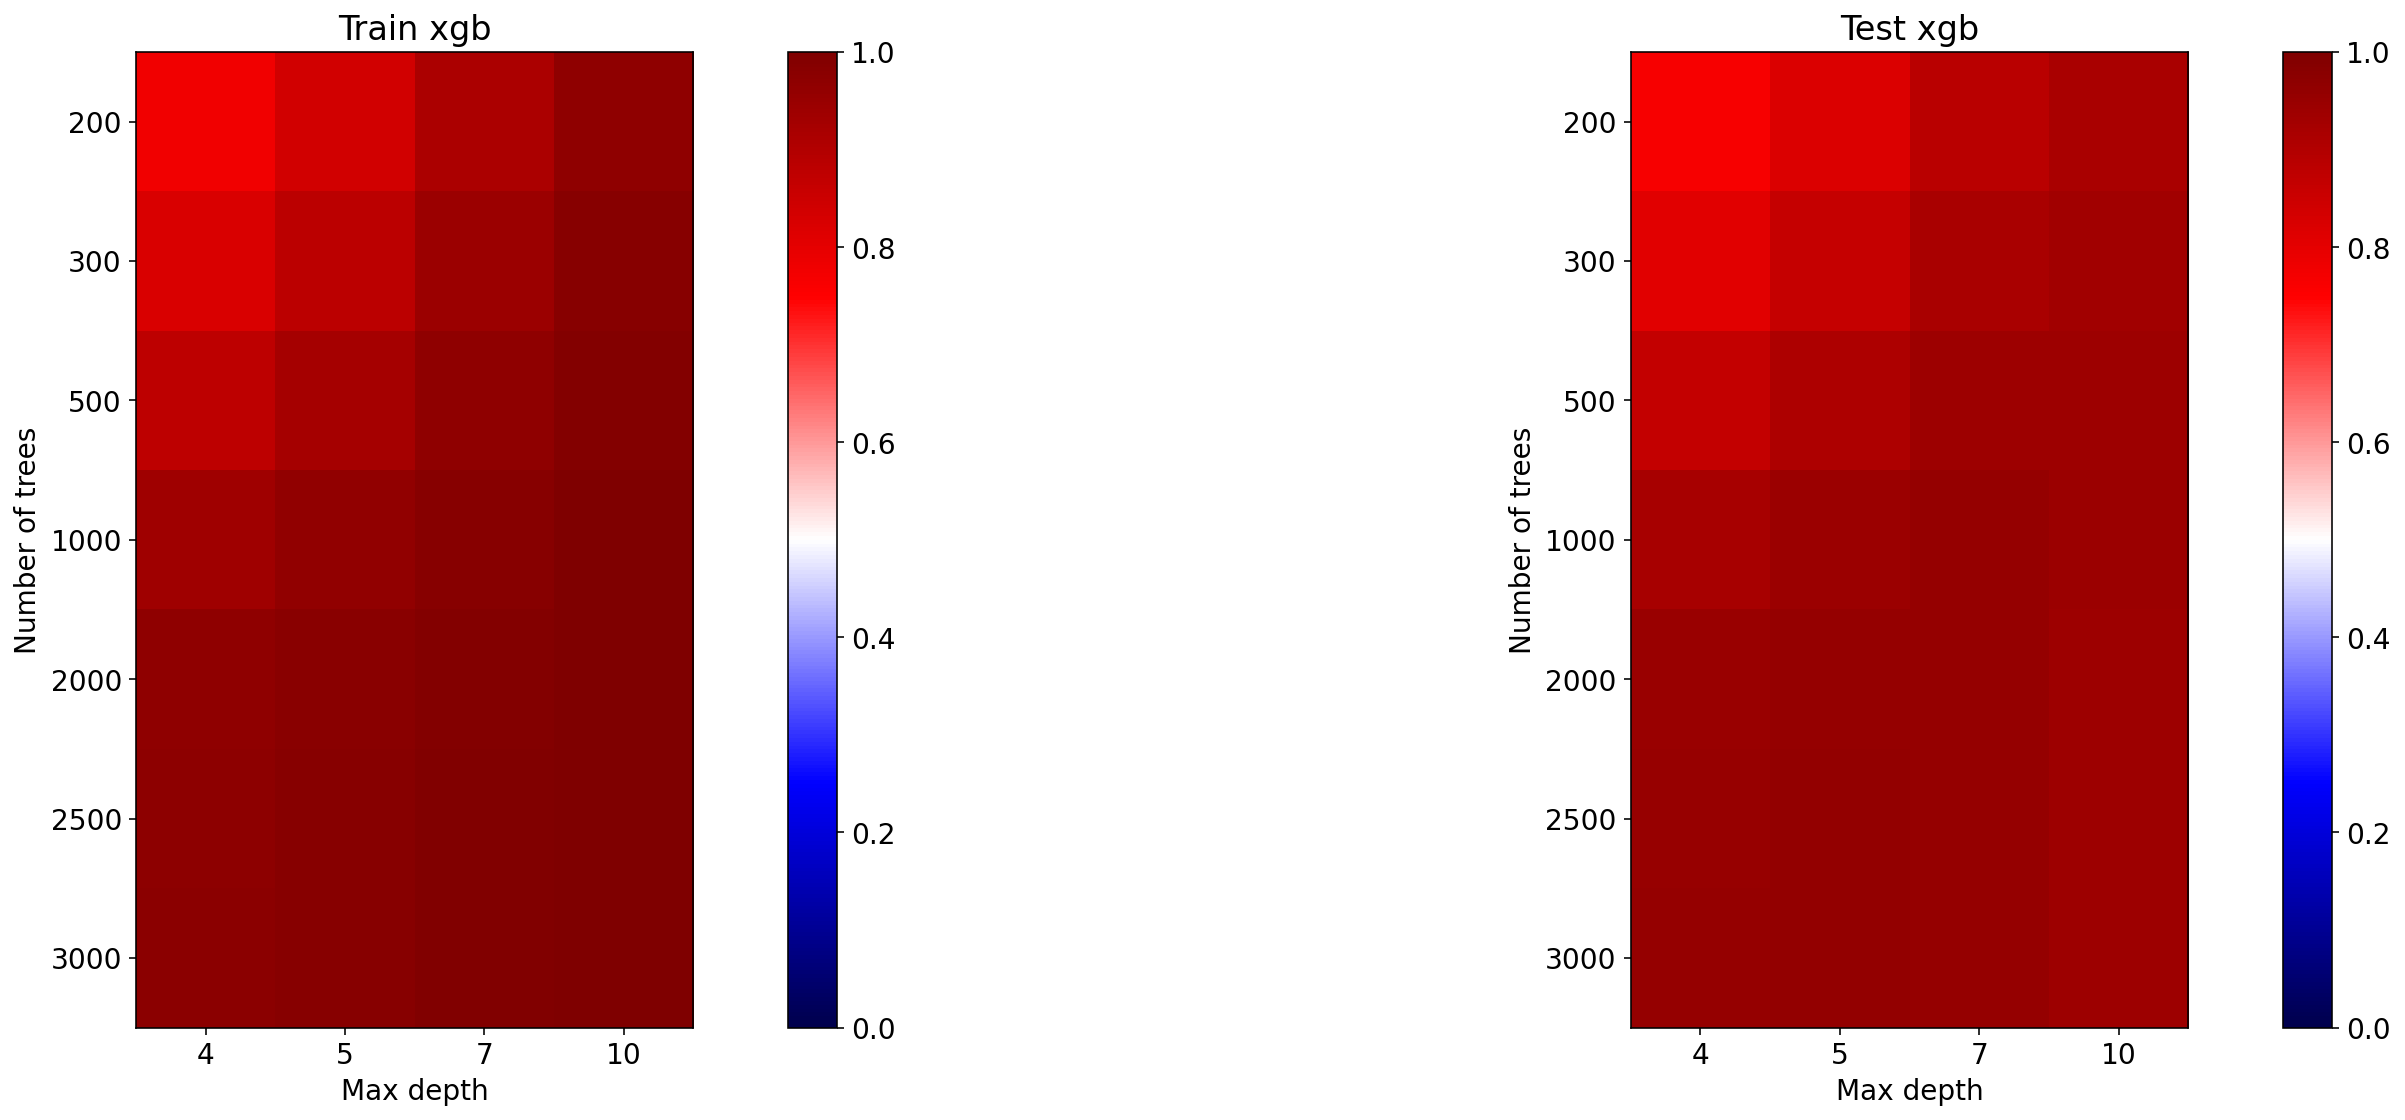

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8), tight_layout=True)
ax[0].set(xticks=np.arange(len(ndepths)), xticklabels=ndepths, xlabel='Max depth',
          yticks=np.arange(len(nests)), yticklabels=nests, ylabel='Number of trees',
          title='Train xgb'
      )
obj = ax[0].imshow(pure_xgb_results[0], cmap=plt.cm.seismic, vmin=0, vmax=1)
fig.colorbar(obj, ax=ax[0])

ax[1].set(xticks=np.arange(len(ndepths)), xticklabels=ndepths, xlabel='Max depth',
          yticks=np.arange(len(nests)), yticklabels=nests, ylabel='Number of trees',
          title='Test xgb'
      )
obj = ax[1].imshow(pure_xgb_results[1], cmap=plt.cm.seismic, vmin=0, vmax=1)
fig.colorbar(obj, ax=ax[1],)

In [83]:
pure_rf_results[1]

array([[0.59360137, 0.63038499, 0.6753324 , 0.70301196],
       [0.59386515, 0.63071137, 0.6765045 , 0.70423635],
       [0.59396757, 0.63030298, 0.67548797, 0.70366874],
       [0.59396835, 0.63037217, 0.67486643, 0.70363327]])

In [84]:
pure_xgb_results[1]

array([[0.76220762, 0.81802292, 0.88494103, 0.91670921],
       [0.80786579, 0.86119095, 0.91634103, 0.93132871],
       [0.86328443, 0.90667098, 0.94075144, 0.93963553],
       [0.9202474 , 0.94385652, 0.953579  , 0.94151525],
       [0.94863335, 0.95689677, 0.95596034, 0.94079818],
       [0.95298323, 0.9584861 , 0.95579108, 0.94048875],
       [0.9557509 , 0.9591321 , 0.95564458, 0.94023554]])

In [85]:
model = xgb.XGBRegressor(n_estimators=3000, learning_rate=0.1, reg_lambda=0.5, max_depth=5, random_state=random_state, n_jobs=-1)
model.fit(new_train, new_train_target)

markers = model.predict(test)

print_metrics(new_test_target, model.predict(new_test))

MAE ~ 484972.1211
R2_score ~ 0.9591


In [86]:
submit(markers, tag='xgb', send=True) # 

### XGB + Stacking

In [87]:
st_train, st_test, st_train_target, st_test_target = train_test_split(new_train, new_train_target, test_size=0.35, random_state=random_state)

In [89]:
n_models = 2
np.random.seed(random_state)
results_on_st_test = np.zeros((n_models, st_test.shape[0]))
results_on_new_test = np.zeros((n_models, new_test.shape[0]))
TEST_TO_SUBMIT = np.zeros((n_models, test.shape[0]))
for k in tqdm_notebook(range(n_models), desc='RF '):
    model = RandomForestRegressor(n_estimators=200, max_depth=10, max_features=st_train.shape[1]//3)
    model.fit(st_train, st_train_target)
    results_on_st_test[k] = model.predict(st_test)
    results_on_new_test[k] = model.predict(new_test)
    TEST_TO_SUBMIT[k] = model.predict(test)

RF :   0%|          | 0/2 [00:00<?, ?it/s]

In [102]:
nests = [200, 300, 500, 1000, 2000, 2500, 3000]
ndepths = [4, 5, 7, 10]

pure_xgb_results = np.zeros((2, len(nests), len(ndepths)))

for row, n_trees in enumerate(tqdm_notebook(nests, desc='Estimators')):
    for col, depth in enumerate(tqdm_notebook(ndepths, desc=f'Depth for {n_trees} trees')):
        model = xgb.XGBRegressor(n_estimators=n_trees, learning_rate=0.1, reg_lambda=0.5, max_depth=depth, random_state=random_state, n_jobs=-1)
        model.fit(np.concatenate((st_test, results_on_st_test.T), axis=1), st_test_target)
        pure_xgb_results[0, row, col] = r2_score(st_test_target, model.predict(np.concatenate((st_test, results_on_st_test.T), axis=1)))
        pure_xgb_results[1, row, col] = r2_score(new_test_target, model.predict(np.concatenate((new_test, results_on_new_test.T), axis=1)))

Estimators:   0%|          | 0/7 [00:00<?, ?it/s]

Depth for 200 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 300 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 500 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 1000 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 2000 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 2500 trees:   0%|          | 0/4 [00:00<?, ?it/s]

Depth for 3000 trees:   0%|          | 0/4 [00:00<?, ?it/s]

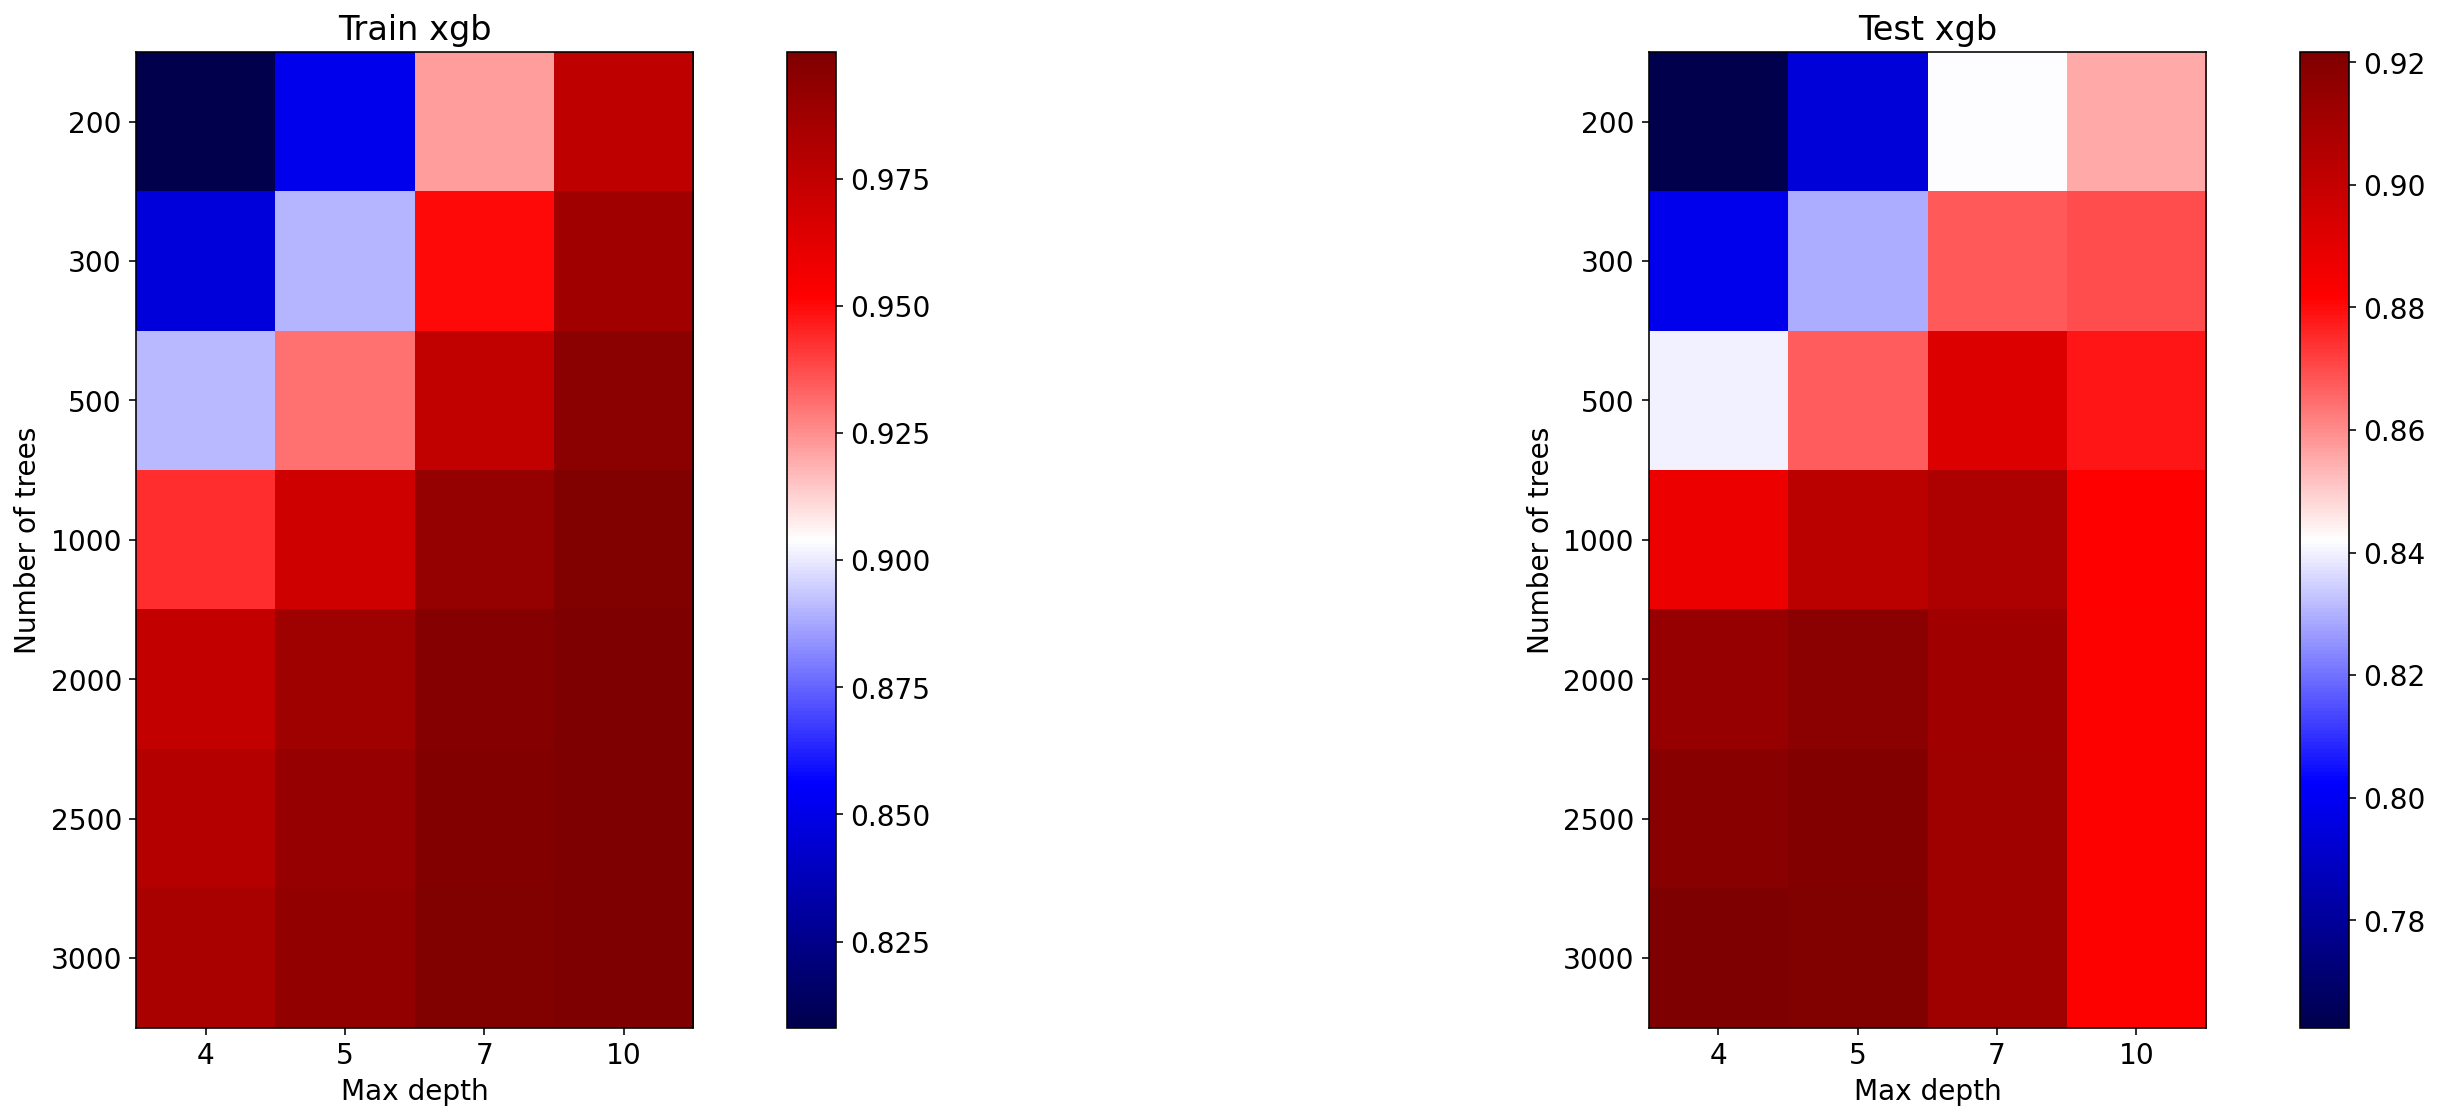

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8), tight_layout=True)
ax[0].set(xticks=np.arange(len(ndepths)), xticklabels=ndepths, xlabel='Max depth',
          yticks=np.arange(len(nests)), yticklabels=nests, ylabel='Number of trees',
          title='Train xgb'
      )
obj = ax[0].imshow(pure_xgb_results[0], cmap=plt.cm.seismic)
fig.colorbar(obj, ax=ax[0])

ax[1].set(xticks=np.arange(len(ndepths)), xticklabels=ndepths, xlabel='Max depth',
          yticks=np.arange(len(nests)), yticklabels=nests, ylabel='Number of trees',
          title='Test xgb'
      )
obj = ax[1].imshow(pure_xgb_results[1], cmap=plt.cm.seismic)
fig.colorbar(obj, ax=ax[1],)

In [104]:
pure_xgb_results[1]

array([[0.76247722, 0.79366433, 0.84146553, 0.85553314],
       [0.79850745, 0.8291799 , 0.86765851, 0.86951406],
       [0.84015882, 0.8669712 , 0.89231025, 0.87814909],
       [0.88695943, 0.90267286, 0.90704229, 0.88178597],
       [0.91382148, 0.91793973, 0.91088806, 0.8824157 ],
       [0.9182508 , 0.91989859, 0.9112238 , 0.88244457],
       [0.92168073, 0.92081772, 0.91129523, 0.88245209]])

In [105]:
model = xgb.XGBRegressor(n_estimators=3000, learning_rate=0.1, reg_lambda=0.5, max_depth=5, random_state=random_state, n_jobs=-1)
model.fit(np.concatenate((st_test, results_on_st_test.T), axis=1), st_test_target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=-1, num_parallel_tree=1, random_state=4,
             reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
markers = model.predict(np.concatenate((test, TEST_TO_SUBMIT.T), axis=1))

In [107]:
submit(markers, tag='xgb_stacking', send=True)